# Classical Encryption Techniques

### Basic Terminology
- plaintext - original message
- ciphertext - coded message
- cipher - algorithm for transforming plaintext to ciphertext
- key - info used in cipher known only to sender/receiver
- encipher (encrypt) - converting plaintext to ciphertext
- decipher (decrypt) – restoring plaintext from cihpertext
- cryptography - study of encryption principles/methods
- cryptanalysis (codebreaking) - study of principles/methods of deciphering ciphertext without knowing key
- cryptology - field of both cryptography and cryptanalysis


### A symmetric encryption scheme has five ingredients:
- **Plaintext**: This is the original intelligible message or data that is fed
into the algorithm as input.
- **Encryption** algorithm: The encryption algorithm performs various
substitutions and transformations on the plaintext.
- **Secret key**: The secret key is also input to the encryption algorithm.

    - The key is a value independent of the plaintext and of the algorithm.
    - The algorithm will produce a different output depending on the specific
    - Key being used at the time. The exact substitutions and
    - Transformations performed by the algorithm depend on the key.

- **Ciphertext**: This is the scrambled message produced as output. It depends on the plaintext and the secret key.<br>
 For a given message, two different keys will produce two different ciphertexts.
- **Decryption algorithm**: This is essentially the encryption algorithm
run in reverse. It takes the ciphertext and the secret key and produces
the original plaintext.

### Requirements
- Two requirements for secure use of symmetric encryption:
- a strong encryption algorithm (weak one: unable to
decipher the ciphertext or figure out the key).
- a secret key known only to sender / receiver

# Cipher substitution
In cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters, pairs of letters, triplets of letters, mixtures of the above, and so forth.

## Classical Substitution Ciphers
- The two basic building blocks of all encryption techniques are substitution and transposition.
- A substitution technique is one in which the letters of plaintext are replaced by other letters or by numbers or symbols. or if plaintext is viewed as a sequence of bits, then substitution involves replacing plaintext bit patterns with ciphertext bit patterns

## Caesar Cipher
The Caesar cipher involves replacing
each letter of the alphabet with the
letter standing three places further
down the alphabet
<br>
**Right shift of 3**
<pre>
Plaintext:  a b c d e f g h i j k l m n o p q r s t u v w x y z
Ciphertext: d e f g h i j k l m n o p q r s t u v w x y z a b c 
</pre>
<pre>
Plaintext:  THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG
Ciphertext: QEB NRFZH YOLTK CLU GRJMP LSBO QEB IXWV ALD
</pre>
Encryption of a letter $x$ by a shift $n$ can be described mathematically as
<br>
$E_{n}(x)=(x+n)\mod{26}$
<br>
$D_{n}(x)=(x-n)\mod{26}$
<br>
PS: $E_{n}$ for Encode $D_{n}$ for Decode

**In ASCII Format**
<br>
$(S)\text{ It is the first letter of the alphabetical order 'A' or 'a' in integer a}\rightarrow97 \text{ and A}\rightarrow64$
<br>
$(x)\text{ It is the order of the letters according to ASCII in integer}$ 
<br>
$(n)\text{ It is the amount of shift to the right or left}$ 
<br>
$E_{n}(x)=((x+n-S)\mod{26})+S$
<br>
$D_{n}(x)=((x-n-S)\mod{26})+S$

In [1]:
def alphabet(shift=0,capital=False):
    if(shift<0):
        shift=(26+(shift%26))
    alphabetical_list=[]
    type_alphabet=ord('a')
    if(capital):
        type_alphabet=ord('A')
    for alpha in range(26):
        alphabetical_list.append(chr((alpha+shift)%26+type_alphabet))
    return alphabetical_list

In [2]:
def alphabet(shift=0,capital=False,custom_alphabet=None):
    import math
    alphabetical_list=[]
    type_alphabet=ord('a')
    if(capital):
        type_alphabet=ord('A')
        
    if(custom_alphabet!=None):
        factor=math.ceil(26/len(custom_alphabet))
        custom_alphabet=custom_alphabet*factor
        for alpha in range(26):
            alphabetical_list.append(custom_alphabet[alpha])
    else:
        if(shift<0):
            shift=(26+(shift%26))
        for alpha in range(26):
            alphabetical_list.append(chr((alpha+shift)%26+type_alphabet))
    return alphabetical_list

In [3]:
def numbered():
    space=' '
    number=0
    for alpha in alphabet():
        print(str(number)+space,end='')
        number=number+1

In [4]:
def display_alphabet(shift=0,capital=False,numbered=False):
    space=' '
    number=0
    for alpha in alphabet(shift,capital):
        if(numbered and number==10):
            space='  '
        number=number+1
        print(alpha+space,end='')
    print('')

In [5]:
print('Plaintext:  ',end='')
display_alphabet(numbered=True)

Plaintext:  a b c d e f g h i j k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  


In [6]:
print('index:      ',end='')
numbered()
print('\nPlaintext:  ',end='')
display_alphabet(numbered=True)
print('Ciphertext: ',end='')
display_alphabet(3,numbered=True)

index:      0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
Plaintext:  a b c d e f g h i j k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  
Ciphertext: d e f g h i j k l m n  o  p  q  r  s  t  u  v  w  x  y  z  a  b  c  


In [7]:
print('Plaintext:  ',end='')
display_alphabet(capital=True)
print('Ciphertext: ',end='')
display_alphabet(3,capital=True)

Plaintext:  A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
Ciphertext: D E F G H I J K L M N O P Q R S T U V W X Y Z A B C 


In [8]:
def caesar_cipheren_encipher(planetext,shift):
    encode_text=""
    if(shift==0):
        return planetext
    elif(shift<0):
        shift=(26+(shift%26))
    for char in planetext:
        if(char>='a' and char<='z'):
            encode_text=encode_text+chr((ord(char)+shift-ord('a'))%26+ord('a'))
        elif(char>='A' and char<='Z'):
            encode_text=encode_text+chr((ord(char)+shift-ord('A'))%26+ord('A'))
        else:
            encode_text=encode_text+char
    return encode_text    

In [9]:
def caesar_cipheren_encipher(planetext,shift):
    encode_text=""
    if(shift==0):
        return planetext
    elif(shift<0):
        shift=(26+(shift%26))
    for char in planetext:
        if(char>='a' and char<='z'):
            encode_text=encode_text+chr((ord(char)+shift-ord('a'))%26+ord('a'))
        elif(char>='A' and char<='Z'):
            encode_text=encode_text+chr((ord(char)+shift-ord('A'))%26+ord('A'))
        else:
            encode_text=encode_text+char
    return encode_text    

In [10]:
def caesar_cipheren_decipher(planetext):
    decode_list=[]
    for alpha in range(26):
        decode_list.append(caesar_cipheren_encipher(planetext,alpha))
    return decode_list

In [11]:
print('Enter Plaintext: ',end='')
input_planetext=input()
print('Enter Shift    : ',end='')
input_shift=int(input())

print('\nindex:      ',end='')
numbered()
print('\nPlaintext:  ',end='')
display_alphabet(numbered=True)
print('Ciphertext: ',end='')
display_alphabet(input_shift,numbered=True)

print(f'\nPlaintext:  {input_planetext}',end='')
print(f'\n\nCiphertext: {caesar_cipheren_encipher(input_planetext,input_shift)}',end='')


Enter Plaintext: Enter Shift    : 
index:      0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
Plaintext:  a b c d e f g h i j k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  
Ciphertext: h i j k l m n o p q r  s  t  u  v  w  x  y  z  a  b  c  d  e  f  g  

Plaintext:  FALKON.PS

Ciphertext: MHSRVU.WZ

In [12]:
'brxjo  ttybvg'[::-1]

'gvbytt  ojxrb'

In [14]:
caesar_cipheren_decipher('FALKON.PS')

['FALKON.PS',
 'GBMLPO.QT',
 'HCNMQP.RU',
 'IDONRQ.SV',
 'JEPOSR.TW',
 'KFQPTS.UX',
 'LGRQUT.VY',
 'MHSRVU.WZ',
 'NITSWV.XA',
 'OJUTXW.YB',
 'PKVUYX.ZC',
 'QLWVZY.AD',
 'RMXWAZ.BE',
 'SNYXBA.CF',
 'TOZYCB.DG',
 'UPAZDC.EH',
 'VQBAED.FI',
 'WRCBFE.GJ',
 'XSDCGF.HK',
 'YTEDHG.IL',
 'ZUFEIH.JM',
 'AVGFJI.KN',
 'BWHGKJ.LO',
 'CXIHLK.MP',
 'DYJIML.NQ',
 'EZKJNM.OR']

## Cryptanalysis of Caesar Cipher
- only have 26 possible ciphers
- could simply try each in turn
- brute-force cryptanalysis is easily performed: simply try all the 25 possible keys.
- eg. break ciphertext "GCUA VQ DTGCM"

In [15]:
caesar_cipheren_decipher('GCUA VQ DTGCM')

['GCUA VQ DTGCM',
 'HDVB WR EUHDN',
 'IEWC XS FVIEO',
 'JFXD YT GWJFP',
 'KGYE ZU HXKGQ',
 'LHZF AV IYLHR',
 'MIAG BW JZMIS',
 'NJBH CX KANJT',
 'OKCI DY LBOKU',
 'PLDJ EZ MCPLV',
 'QMEK FA NDQMW',
 'RNFL GB OERNX',
 'SOGM HC PFSOY',
 'TPHN ID QGTPZ',
 'UQIO JE RHUQA',
 'VRJP KF SIVRB',
 'WSKQ LG TJWSC',
 'XTLR MH UKXTD',
 'YUMS NI VLYUE',
 'ZVNT OJ WMZVF',
 'AWOU PK XNAWG',
 'BXPV QL YOBXH',
 'CYQW RM ZPCYI',
 'DZRX SN AQDZJ',
 'EASY TO BREAK',
 'FBTZ UP CSFBL']

## Monoalphabetic Cipher
<pre>
Recall the assignment for the Caesar cipher:

Plain:      abcdefghijklmnopqrstuvwxyz
Cipher:     DKVQFIBJWPESCXHTMYAUOLRGZN

Plaintext:  ifwewishtoreplaceletters
Ciphertext: WIRFRWAJUHYFTSDVFSFUUFYA 
</pre>

In [16]:
frequency={'a':14810,
 'b': 2715,
 'c': 4943,
 'd': 7874,
 'e': 21912,
 'f': 4200,
 'g': 3693,
 'h': 10795,
 'i': 13318,
 'j': 188,
 'k': 1257,
 'l': 7874,
 'm': 4761,
 'n': 12666,
 'o': 14003,
 'p': 3316,
 'q': 205,
 'r': 10977,
 's': 11450,
 't': 16587,
 'u': 5246,
 'v': 2019,
 'w': 3819,
 'x': 315,
 'y': 3853,
 'z': 128}

In [17]:
frequency

{'a': 14810,
 'b': 2715,
 'c': 4943,
 'd': 7874,
 'e': 21912,
 'f': 4200,
 'g': 3693,
 'h': 10795,
 'i': 13318,
 'j': 188,
 'k': 1257,
 'l': 7874,
 'm': 4761,
 'n': 12666,
 'o': 14003,
 'p': 3316,
 'q': 205,
 'r': 10977,
 's': 11450,
 't': 16587,
 'u': 5246,
 'v': 2019,
 'w': 3819,
 'x': 315,
 'y': 3853,
 'z': 128}

In [18]:
dict(zip(['a','b'],['a','b']))

{'a': 'a', 'b': 'b'}

In [19]:
def monoalphabetic(plaintext,cipher,plain=alphabet()):
    cipher=cipher.lower()
    directory_letter=dict(zip(plain,cipher))
    ciphertext=""
    for i in plaintext:
        if(i>='a' and i<='z'):
            ciphertext=ciphertext+directory_letter[i].lower()
        elif(i>='A' and i<='Z'):
            ciphertext=ciphertext+str(directory_letter[i.lower()].upper())
    return ciphertext

In [20]:
monoalphabetic('ifwewishtoreplaceletters','DKVQFIBJWPESCXHTMYAUOLRGZN')

'wirfrwajuhyftsdvfsfuufya'

In [22]:
def frequency_distribution(text):
    dir_text={}
    text=text.lower()
    for i in alphabet():
        dir_text[i]=0
    for i in text:
        if(i>='a' and i<='z'):
            dir_text[i]= dir_text[i]+1
    ex=0
    for i in dir_text:
        if(dir_text[i]):
            ex=ex+1
    for i in alphabet():
        dir_text[i]=dir_text[i]
    return dir_text

In [23]:
ant=frequency_distribution('A long time ago, in a galaxy far, far away... It is a dark time for the Rebellion. Although the Death Star has been destroyed, Imperial troops have driven the Rebel forces from their hidden base and pursued them across the galaxy. Evading the dreaded Imperial Starfleet, a group of freedom fighters led by Luke Skywalker has established a new secret base on the remote ice world of Hoth. The evil lord Darth Vader, obsessed with finding young Skywalker, has dispatched thousands of remote probes into the far reaches of space…')

<Axes: >

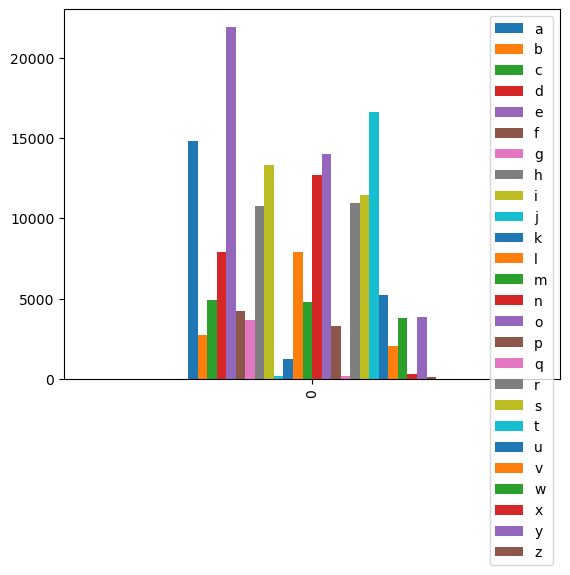

In [24]:
import pandas as pd
pd.DataFrame(frequency,index=[0]).plot(kind='bar')

<Axes: >

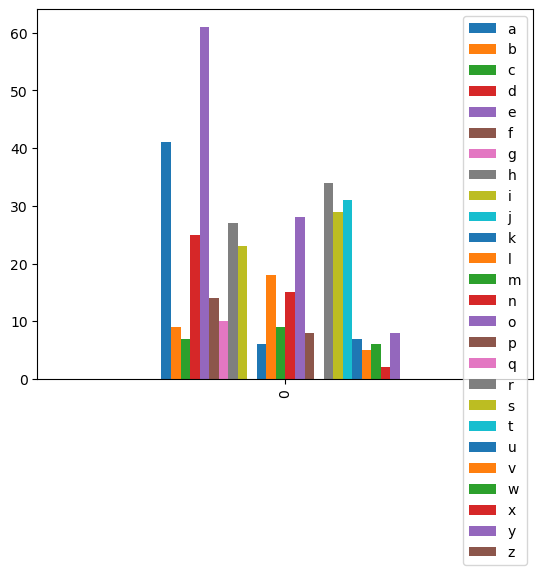

In [25]:
import pandas as pd
pd.DataFrame(ant,index=[0]).plot(kind='bar')


In [26]:
frequency

{'a': 14810,
 'b': 2715,
 'c': 4943,
 'd': 7874,
 'e': 21912,
 'f': 4200,
 'g': 3693,
 'h': 10795,
 'i': 13318,
 'j': 188,
 'k': 1257,
 'l': 7874,
 'm': 4761,
 'n': 12666,
 'o': 14003,
 'p': 3316,
 'q': 205,
 'r': 10977,
 's': 11450,
 't': 16587,
 'u': 5246,
 'v': 2019,
 'w': 3819,
 'x': 315,
 'y': 3853,
 'z': 128}

In [27]:
t='At the emergence of the Wikipedia project in 2001  there were calls to create an Arabic domain raised by Arab engineers.[4] The domain was created as  ar.wikipedia.org  but no serious activity took place except with anonymous users who experimented with the idea.[5] Until 7 February 2003  all contributors to the Arabic Wikipedia were non-Arab volunteers from the International Project Wikipedia[6] that handled the technical aspects. Elizabeth Bauer  who used the user name Elian in the Arabic Wikipedia  approached many Arabic speakers who potentially might be interested in volunteering to spearhead the Arabic project. The only group who responded was the ArabEyes team who were involved in Arabizing the Open Source initiatives. Elian s request was conservatively received and the ArabEyes team was ready to participate but not take a leadership role[7] and then declined to participate on the second of February 2003. During this negotiation time  volunteer users from the German Wikipedia project continued to develop the technical infrastructure of the Arabic Wikipedia backbone.[8][9] In 2003 Rami Tarawneh (Arabic: رامي عوض الطراونة)  a Jordanian PhD student in Germany who originated from Zarqa  encountered the English Wikipedia and began to edit content. Contributors encouraged him to start an Arabic Wikipedia.[10] The Arabic Wikipedia opened in July 2003.[11] By that year a significant group of contributors included Tarawneh and four other Jordanians studying in Germany.[10] On 7 February 2004 [12] one member from the ArabEyes  Isam Bayazidi (Arabic: عصام بايزيدي)  volunteered with 4 other friends to be involved with the Arabic Wikipedia and assumed some leadership roles. In 2004  Bayazid was assigned the SysOp responsibilities and he  with another 5 volunteers  namely Ayman  Abo Suleiman  Mustapha Ahmad and Bassem Jarkas[13] are considered to be the first Arabs to lead the Wikipedia project and they are attributed for working on translating and enforcing the English policies to Arabic. The Arabic Wikipedia faced many challenges at its inception. In February 2004  it was considered to be the worst Wikipedia project among all other languages. However  in 2005  it showed phenomenal progress by which in December 2005  the total number of articles reached 8 285.[14] By that time  there were fewer than 20 contributors and the administrators and contributors made efforts to recruit new users.[10] In 2007 the secret police in an unspecified country detained Tarawneh and demanded that he reveal the IP address of a contributor. To protect the Wikipedian  the administrators forged a dispute that was the presumed reason for Tarawneh losing his administrator access  so the secret police was unable to obtain the IP. In response to the incident  the rules now state that no one user may have access to all information about the Wikipedia s users.[10] Second Conference of the Wikipedia Education Program in Cairo University  Egypt  27 February 2013 In 2008 the Wikipedia had had fewer than 65 000 articles and was ranked No. 29 out of the Wikipedias  behind the Esperanto Wikipedia and the Slovenian Wikipedia. Noam Cohen of The New York Times reported that  to many of the attendees of the 2008 Wikimania conference in Alexandria  Egypt  the  woeful shape of the Arabic Wikipedia has been the cause of chagrin. [15] Cohen stated that out of Egyptians  fewer than 10%  are thought to have internet access  and of those with internet access many tend to be knowledgeable in English and have a preference of communicating in that language.[15] The Arabic Wikipedia had 118 870 articles as of 15 January 2010. As of July 2012 there are around 630 active Arabic Wikipedia editors around the world. Ikram Al-Yacoub of Al Arabiya says that this is  a relatively low figure. [16] At the time there were hundreds of thousands of Wikipedia articles on the Arabic Wikipedia.[10] The Wikimedia Foundation and the nonprofit group Taghreedat established the  Arabic Wikipedia Editors Program  intended to train users to edit the Arabic Wikipedia.[16] By the end of June 2014  the number of articles had reached 384 000[17] Iraqi volunteers have translated much of English Wikipedia into Arabic Wikipedia.[18] More recently  a project named Bayt Alhikma has translated more than 10 000 articles about science and other topics in Arabic. The number of active users in Arabic Wikipedia is increasing quickly  reaching the 10 000 mark for first time on 10 February 2021.[19]'

In [28]:
ant=frequency_distribution(t)

In [29]:
ant

{'a': 360,
 'b': 80,
 'c': 122,
 'd': 154,
 'e': 445,
 'f': 61,
 'g': 49,
 'h': 159,
 'i': 315,
 'j': 14,
 'k': 46,
 'l': 83,
 'm': 66,
 'n': 241,
 'o': 213,
 'p': 88,
 'q': 4,
 'r': 244,
 's': 169,
 't': 303,
 'u': 87,
 'v': 27,
 'w': 78,
 'x': 3,
 'y': 51,
 'z': 5}

In [30]:
ant=dict(sorted(ant.items(), key=lambda item: item[1]))

In [31]:
frequency=dict(sorted(frequency.items(), key=lambda item: item[1]))

In [32]:
frequency

{'z': 128,
 'j': 188,
 'q': 205,
 'x': 315,
 'k': 1257,
 'v': 2019,
 'b': 2715,
 'p': 3316,
 'g': 3693,
 'w': 3819,
 'y': 3853,
 'f': 4200,
 'm': 4761,
 'c': 4943,
 'u': 5246,
 'd': 7874,
 'l': 7874,
 'h': 10795,
 'r': 10977,
 's': 11450,
 'n': 12666,
 'i': 13318,
 'o': 14003,
 'a': 14810,
 't': 16587,
 'e': 21912}

In [33]:
list(zip(frequency,ant))

[('z', 'x'),
 ('j', 'q'),
 ('q', 'z'),
 ('x', 'j'),
 ('k', 'v'),
 ('v', 'k'),
 ('b', 'g'),
 ('p', 'y'),
 ('g', 'f'),
 ('w', 'm'),
 ('y', 'w'),
 ('f', 'b'),
 ('m', 'l'),
 ('c', 'u'),
 ('u', 'p'),
 ('d', 'c'),
 ('l', 'd'),
 ('h', 'h'),
 ('r', 's'),
 ('s', 'o'),
 ('n', 'n'),
 ('i', 'r'),
 ('o', 't'),
 ('a', 'i'),
 ('t', 'a'),
 ('e', 'e')]

In [34]:
b=dict(zip(frequency,ant))

In [35]:
b

{'z': 'x',
 'j': 'q',
 'q': 'z',
 'x': 'j',
 'k': 'v',
 'v': 'k',
 'b': 'g',
 'p': 'y',
 'g': 'f',
 'w': 'm',
 'y': 'w',
 'f': 'b',
 'm': 'l',
 'c': 'u',
 'u': 'p',
 'd': 'c',
 'l': 'd',
 'h': 'h',
 'r': 's',
 's': 'o',
 'n': 'n',
 'i': 'r',
 'o': 't',
 'a': 'i',
 't': 'a',
 'e': 'e'}

In [36]:
def __monoalphabetic(plaintext,cipher,plain=alphabet()):
    plaintext=plaintext.lower()
    directory_letter=cipher
    ciphertext=""
    for i in plaintext:
        if(i>='a' and i<='z'):
            ciphertext=ciphertext+directory_letter[i].lower()
        elif(i>='A' and i<='Z'):
            ciphertext=ciphertext+str(directory_letter[i.lower()].upper())
        else:
            ciphertext=ciphertext+i
    return ciphertext

For instance, FAR ABOVE CAYUGA’S WATERS is enciphered as OCVCA NWYIC QPBCE LCGYE.


In [37]:
b['i']='a'
b['a']='n'
b['n']='a'

In [38]:
__monoalphabetic(t,b)

'na ahe elesfeaue tb ahe mavayecan ystqeua aa 2001  ahese mese unddo at usenae na nsngau ctlnaa snaoec gw nsng eafaaeeso.[4] ahe ctlnaa mno usenaec no  ns.mavayecan.tsf  gpa at oesatpo nuaakaaw attv ydnue ejueya maah natawltpo poeso mht ejyesaleaaec maah ahe acen.[5] paaad 7 begspnsw 2003  ndd utaasagpatso at ahe nsngau mavayecan mese ata-nsng ktdpaaeeso bstl ahe aaaesanaatand ystqeua mavayecan[6] ahna hnacdec ahe aeuhaaund noyeuao. edaxngeah gnpes  mht poec ahe poes anle edana aa ahe nsngau mavayecan  nyystnuhec lnaw nsngau oyenveso mht ytaeaaanddw lafha ge aaaeseoaec aa ktdpaaeesaaf at oyenshenc ahe nsngau ystqeua. ahe tadw fstpy mht seoytacec mno ahe nsngeweo aenl mht mese aaktdkec aa nsngaxaaf ahe tyea otpsue aaaaanaakeo. edana o sezpeoa mno utaoesknaakedw seueakec nac ahe nsngeweo aenl mno sencw at ynsaauaynae gpa ata anve n dencesohay stde[7] nac ahea ceudaaec at ynsaauaynae ta ahe oeutac tb begspnsw 2003. cpsaaf ahao aeftaanaata aale  ktdpaaees poeso bstl ahe feslna mavayecan ys

In [39]:
print(ord('v')-ord('a'))
print(ord('f')-ord('a'))

21
5


In [40]:
ord('v')+ord('f')-2*ord('a')

26

In [41]:
3*2+ord('a')

103

In [42]:
matrix=[]
for alpha in range(26):
    matrix.append(alphabet(shift=alpha))

In [43]:
for i in range(26):
    for j in range(26):
        print(str(matrix[i][j])+" ",end="")
    print('')

a b c d e f g h i j k l m n o p q r s t u v w x y z 
b c d e f g h i j k l m n o p q r s t u v w x y z a 
c d e f g h i j k l m n o p q r s t u v w x y z a b 
d e f g h i j k l m n o p q r s t u v w x y z a b c 
e f g h i j k l m n o p q r s t u v w x y z a b c d 
f g h i j k l m n o p q r s t u v w x y z a b c d e 
g h i j k l m n o p q r s t u v w x y z a b c d e f 
h i j k l m n o p q r s t u v w x y z a b c d e f g 
i j k l m n o p q r s t u v w x y z a b c d e f g h 
j k l m n o p q r s t u v w x y z a b c d e f g h i 
k l m n o p q r s t u v w x y z a b c d e f g h i j 
l m n o p q r s t u v w x y z a b c d e f g h i j k 
m n o p q r s t u v w x y z a b c d e f g h i j k l 
n o p q r s t u v w x y z a b c d e f g h i j k l m 
o p q r s t u v w x y z a b c d e f g h i j k l m n 
p q r s t u v w x y z a b c d e f g h i j k l m n o 
q r s t u v w x y z a b c d e f g h i j k l m n o p 
r s t u v w x y z a b c d e f g h i j k l m n o p q 
s t u v w x y z a b c d e f g h i j k l m n o 

In [44]:
chr((ord('y')+ord('r')-ord('a')*2)%26+ord('a'))

'p'

## Vigenère cipher
Plaintext letters $P=p_0,p_1,p_2,\ldots,p_{n-1}$
<br>
Key letters $K=k_0,k_1,k_2,\ldots,p_{m-1}$
<br>
ciphertext letters $C=c_0,c_1,c_2,\ldots,c_{n-1}$
<br>
<br>
$\text{where } m<=n$
<br>
<br>
$C=c_0,c_1,c_2,\ldots,c_{n-1}=E(K,P)=E\bigl[(k_0,k_1,k_2,\ldots,p_{m-1}),(p_0,p_1,p_2,\ldots,p_{n-1})\bigl]$
<br>
<br>
$C=\bigl[(p_0+k_0)\mod 26,(p_1+k_1)\mod 26,\ldots,(p_{m-1}+k_{m-1})\mod 26\bigl]$
<pre>
key:        deceptivewearediscoveredsav
plaintext:  wearediscoveredsaveyourself
ciphertext: ZICVTWONGKZEIIGASXSTSLVVWLA
</pre>

<pre>
    PLAINTEXT                                   |
    vvvvvvvvv                                   v
KEY>a b c d e f g h i j k l m n o p q r s t u v|w|x y z 
    b c d e f g h i j k l m n o p q r s t u v w|x|y z a 
    c d e f g h i j k l m n o p q r s t u v w x|y|z a b 
 -->d e f g h i j k l m n o p q r s t u v w x y(z)a b c 
    e f g h i j k l m n o p q r s t u v w x y z a b c d 
    f g h i j k l m n o p q r s t u v w x y z a b c d e 
    g h i j k l m n o p q r s t u v w x y z a b c d e f 
    h i j k l m n o p q r s t u v w x y z a b c d e f g 
    i j k l m n o p q r s t u v w x y z a b c d e f g h 
    j k l m n o p q r s t u v w x y z a b c d e f g h i 
    k l m n o p q r s t u v w x y z a b c d e f g h i j 
    l m n o p q r s t u v w x y z a b c d e f g h i j k 
    m n o p q r s t u v w x y z a b c d e f g h i j k l 
    n o p q r s t u v w x y z a b c d e f g h i j k l m 
    o p q r s t u v w x y z a b c d e f g h i j k l m n 
    p q r s t u v w x y z a b c d e f g h i j k l m n o 
    q r s t u v w x y z a b c d e f g h i j k l m n o p 
    r s t u v w x y z a b c d e f g h i j k l m n o p q 
    s t u v w x y z a b c d e f g h i j k l m n o p q r 
    t u v w x y z a b c d e f g h i j k l m n o p q r s 
    u v w x y z a b c d e f g h i j k l m n o p q r s t 
    v w x y z a b c d e f g h i j k l m n o p q r s t u 
    w x y z a b c d e f g h i j k l m n o p q r s t u v 
    x y z a b c d e f g h i j k l m n o p q r s t u v w 
    y z a b c d e f g h i j k l m n o p q r s t u v w x 
    z a b c d e f g h i j k l m n o p q r s t u v w x y </pre>

In [45]:
matrix=[]
for alpha in range(26):
    matrix.append(alphabet(shift=alpha))


In [46]:
ord('d')-ord('a')

3

In [47]:
ord('w')-ord('a')

22

In [48]:
matrix[3][22]

'z'

In [49]:
ord('a'),ord('z')

(97, 122)

In [50]:
ord('A'),ord('Z')

(65, 90)

## Way 2

**Encipher**

In [51]:
def vigenere_cipher_encipher(planetext,cipherkey):
    encode_text=""
    cipherkey=cipherkey.lower()
    if(len(cipherkey)<len(planetext)):
        # Sentence repeat
        import math
        factor=len(planetext)/len(cipherkey)
        cipherkey=cipherkey*math.ceil(factor)
        
    for alpha in range(len(planetext)):
        if(planetext[alpha]>='a' and planetext[alpha]<='z' or planetext[alpha]>='A' and planetext[alpha]<='Z'):
            type_char=ord('a')
            if(planetext[alpha]<='Z'):
                type_char=ord('A')
            # letter_planetext position + letter_ciphertext position - ASCII Code
            letter_position=ord(planetext[alpha])+ord(cipherkey[alpha])-type_char-ord('a')
            encode_text=encode_text+chr((letter_position)%26+type_char)
        else:
            encode_text=encode_text+planetext[alpha]
    return encode_text

**Decipher**

In [52]:
def vigenere_cipher_decipher(planetext,cipherkey):
    encode_text=""
    cipherkey=cipherkey.lower()
    if(len(cipherkey)<len(planetext)):
        # Sentence repeat
        import math
        factor=len(planetext)/len(cipherkey)
        cipherkey=cipherkey*math.ceil(factor)
        
    for alpha in range(len(planetext)):
        if(planetext[alpha]>='a' and planetext[alpha]<='z' or planetext[alpha]>='A' and planetext[alpha]<='Z'):
            type_char=ord('a')
            if(planetext[alpha]<='Z'):
                type_char=ord('A')
            # letter_planetext position + letter_ciphertext position - ASCII Code
            letter_position=(ord(planetext[alpha])-type_char)-(ord(cipherkey[alpha])-ord('a'))
            encode_text=encode_text+chr((letter_position)%26+type_char)
        else:
            encode_text=encode_text+planetext[alpha]
    return encode_text

In [53]:
print(vigenere_cipher_encipher('WEarediscoveredsaveyourself','DEceptiVEwearediscoveredsav'))
print(vigenere_cipher_decipher('ZicvtwqngkzEiigasxsTslvvwla','deceptivewearediscoveredsav'))

ZIcvtwqngkzeiigasxstslvvwla
WearediscovEredsaveYourself


In [54]:
print(vigenere_cipher_encipher('WEarediscoveredsaveyourself','DEceptiVEwearediscoveredsav'))
print(vigenere_cipher_decipher('ZicvtwqngkzEiigasxsTslvvwla','deceptivewearediscoveredsav'))

ZIcvtwqngkzeiigasxstslvvwla
WearediscovEredsaveYourself


<pre>
key:        deceptivewearediscoveredsav
plaintext:  wearediscoveredsaveyourself
ciphertext: ZICVTWONGKZEIIGASXSTSLVVWLA
</pre>

## Playfiar
<pre>
key:        deceptivewearediscoveredsav
plaintext:  wearediscoveredsaveyourself
ciphertext: VCRICESHEBOVVTIHRWPUKEIGCKBY
The Playfair algorithm is based on the use of a 5 * 5 matrix of letters
constructed using a keyword.
• In this case, the keyword is monarchy.
• The matrix is constructed by filling in the letters of the keyword (minus duplicates) from left to right and from top to bottom, and then filling in the
remainder of the matrix with the remaining letters in alphabetic order.
• The letters I and J count as one letter.
</pre>


In [55]:
def playfiar_alphabet_adder(cipher,shift=0,capital=False):
    if(shift<0):
        shift=(26+(shift%26))
    alphabetical_list=[]
    for alpha in cipher:
        if(alpha in alphabetical_list):
            continue
        alphabetical_list.append(alpha)
    type_alphabet=ord('a')
    if(capital):
        type_alphabet=ord('A')
    for alpha in range(26):
        letter=chr((alpha+shift)%26+type_alphabet)
        if(letter in alphabetical_list or letter =='j'):
            continue
        alphabetical_list.append(letter)
    return alphabetical_list

In [56]:
matrix_alphabet=playfiar_alphabet_adder('playfiar')
for i in range(len(matrix_alphabet)):
    if(i%5==0):
        print('')
    print(matrix_alphabet[i],end=' ')


p l a y f 
i r b c d 
e g h k m 
n o q s t 
u v w x z 

In [57]:
def pairs_of_letters(planetext,separate_by='x'):
    planetext_as_pairs=[]
    index=0
    len_planetext=len(planetext)
    if(len_planetext%2==1):
        planetext=planetext+separate_by
    while(index<len_planetext):
        if((index+1)==len_planetext) or planetext[index]==planetext[index+1]:
            planetext_as_pairs.append((planetext[index],separate_by))
            index=index+1
            continue
        planetext_as_pairs.append((planetext[index],planetext[index+1]))
        index=index+2
    return planetext_as_pairs

In [58]:
pairs_of_letters('abcdannn')

[('a', 'b'), ('c', 'd'), ('a', 'n'), ('n', 'x'), ('n', 'x')]

In [59]:
pairs_of_letters('playfiar')

[('p', 'l'), ('a', 'y'), ('f', 'i'), ('a', 'r')]

In [60]:
def playfiar_matrix(key):
    key=key.lower()
    matrix_alphabet=playfiar_alphabet_adder(key)
    matrix_return=[]
    inner_matrix=[]
    for i in range(len(matrix_alphabet)):
        if(i!=0 and i%5==0):
            matrix_return.append(inner_matrix)
            inner_matrix=[]
        inner_matrix.append(matrix_alphabet[i])
    matrix_return.append(inner_matrix)
    return matrix_return

In [61]:
playfiar_alphabet_adder('playfiar');

In [62]:
pairs_of_letters('playfiar')

[('p', 'l'), ('a', 'y'), ('f', 'i'), ('a', 'r')]

In [63]:
playfiar_matrix('playfiar')

[['p', 'l', 'a', 'y', 'f'],
 ['i', 'r', 'b', 'c', 'd'],
 ['e', 'g', 'h', 'k', 'm'],
 ['n', 'o', 'q', 's', 't'],
 ['u', 'v', 'w', 'x', 'z']]

In [64]:
def playfiar_matrix_finder(letter_alpha,letter_beta,matrix):
    index_alpha=(7,7)
    index_beta=(7,7)
    cip=""
    
    for k in range(len(matrix)):
        for h in range(len(matrix)):
            if(letter_alpha.lower()==matrix[k][h]):
                # print(letter_alpha)
                index_alpha=(k,h)
            if(letter_beta.lower()==matrix[k][h]):
                # print(letter_beta)
                index_beta=(k,h)
            if(index_alpha!=(7,7) and index_beta!=(7,7)):
                # print(index_alpha)
                # print(index_beta)
                if(index_alpha[1]==index_beta[1]):
                    # print('col')
                    cip=cip+matrix[(index_alpha[0]+1)%5][index_alpha[1]%5]
                    cip=cip+matrix[(index_beta[0]+1)%5][index_beta[1]%5] 
                elif(index_alpha[0]==index_beta[0]):
                    # print('row')
                    cip=cip+matrix[index_alpha[0]%5][(index_alpha[1]+1)%5]
                    cip=cip+matrix[index_beta[0]%5][(index_beta[1]+1)%5]
                elif(index_alpha[0]==index_beta[1] or index_alpha[1]==index_beta[0]):
                    # print('rectangle or square')
                    cip=cip+matrix[index_alpha[0]][(index_beta[1])]
                    cip=cip+matrix[index_beta[0]][(index_alpha[1])]
                else:
                    # print('rectangle or square')
                    cip=cip+matrix[index_alpha[0]][(index_beta[1])]
                    cip=cip+matrix[index_beta[0]][(index_alpha[1])]
                index_alpha=(7,7)
                index_beta=(7,7)
    case=""
    if(letter_alpha>='A' and letter_alpha<='Z'):
        case=case+cip[0].upper()
    else:
        case=case+cip[0]
    if(letter_beta>='A' and letter_beta<='Z'):
        case=case+cip[1].upper()
    else:
        case=case+cip[1]
    return case

In [65]:
def playfair_solver(planetext,key):
    planetext_pairs=pairs_of_letters(planetext)
    matrix=playfiar_matrix(key)
    cip=""
    for letter_alpha,letter_beta in planetext_pairs:
        cip=cip+playfiar_matrix_finder(letter_alpha,letter_beta,matrix) 
    return cip
playfair_solver('falkonps','freepalestine')

'rfbvutri'

<pre>
key:        deceptivewearediscoveredsav
plaintext:  wearediscoveredsaveyourself
ciphertext: VCRICESHEBOVVTIHRWPUKEIGCKBY
</pre>


In [66]:
playfair_solver('FalkonPS','freepalestine')

'RfbvutRI'

In [72]:
playfair_solver('falkonps','Freepalestine')

'rfbvutri'

In [73]:
pairs_of_letters('falkonps')

[('f', 'a'), ('l', 'k'), ('o', 'n'), ('p', 's')]

In [74]:
playfiar_matrix('freepalestine')

[['f', 'r', 'e', 'p', 'a'],
 ['l', 's', 't', 'i', 'n'],
 ['b', 'c', 'd', 'g', 'h'],
 ['k', 'm', 'o', 'q', 'u'],
 ['v', 'w', 'x', 'y', 'z']]

In [75]:
pairs_of_letters('abcdammm',separate_by='x')

[('a', 'b'), ('c', 'd'), ('a', 'm'), ('m', 'x'), ('m', 'x')]

# MY

In [77]:
for i in range(17):
    print(str(i)+':'+str(i*i))

0:0
1:1
2:4
3:9
4:16
5:25
6:36
7:49
8:64
9:81
10:100
11:121
12:144
13:169
14:196
15:225
16:256


In [78]:
inner_matrix=[]
matrix_return=[]
for i in range(256):
    if(i!=0 and i%16==0):
        matrix_return.append(inner_matrix)
        inner_matrix=[]
        print('')
    inner_matrix.append(chr(i))
    print(chr(i),end=' ')
    matrix_return.append(inner_matrix)

         	 
   
                
  ! " # $ % & ' ( ) * + , - . / 
0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
@ A B C D E F G H I J K L M N O 
P Q R S T U V W X Y Z [ \ ] ^ _ 
` a b c d e f g h i j k l m n o 
p q r s t u v w x y z { | } ~  
                
                
  ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ­ ® ¯ 
° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ 
À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï 
Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß 
à á â ã ä å æ ç è é ê ë ì í î ï 
ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ 

In [79]:
def playfiar_alphabet_adder_256(cipher):
    alphabetical_list=[]
    for alpha in cipher:
        if(alpha in alphabetical_list):
            continue
        alphabetical_list.append(alpha)
    for alpha in range(256):
        letter=chr(alpha)
        if(letter in alphabetical_list):
            continue
        alphabetical_list.append(letter)
    return alphabetical_list

In [80]:
def playfiar_matrix_256(key):
    matrix_alphabet=playfiar_alphabet_adder_256(key)
    matrix_return=[]
    inner_matrix=[]
    for i in range(len(matrix_alphabet)):
#         print(matrix_alphabet[i],end=' ')
        if(i!=0 and i%16==0):
            matrix_return.append(inner_matrix)
            inner_matrix=[]
#             print('')
        inner_matrix.append(matrix_alphabet[i])
    print(len(matrix_alphabet))
    matrix_return.append(inner_matrix)
    return matrix_return

In [81]:
playfiar_matrix_256('abcd ');

256


In [82]:
[len(x) for x in playfiar_matrix_256('')]

256


[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

In [83]:
def playfiar_matrix_finder_256(letter_alpha,letter_beta,matrix):
    out_base=(9999,9999)
    index_alpha=out_base
    index_beta=out_base
    cip=""
    for k in range(len(matrix)):
        for h in range(len(matrix)):
            if(letter_alpha==matrix[k][h]):
                # print(letter_alpha)
                index_alpha=(k,h)
            if(letter_beta==matrix[k][h]):
                # print(letter_beta)
                index_beta=(k,h)
            if(index_alpha!=out_base and index_beta!=out_base):
                # print(index_alpha)
                # print(index_beta)
                if(index_alpha[1]==index_beta[1]):
                    # print('col')
                    cip=cip+matrix[(index_alpha[0]+1)%16][index_alpha[1]%16]
                    cip=cip+matrix[(index_beta[0]+1)%16][index_beta[1]%16] 
                elif(index_alpha[0]==index_beta[0]):
                    # print('row')
                    cip=cip+matrix[index_alpha[0]%16][(index_alpha[1]+1)%16]
                    cip=cip+matrix[index_beta[0]%16][(index_beta[1]+1)%16]
                elif(index_alpha[0]==index_beta[1] or index_alpha[1]==index_beta[0]):
                    # print('rectangle or square')
                    cip=cip+matrix[index_alpha[0]][(index_beta[1])]
                    cip=cip+matrix[index_beta[0]][(index_alpha[1])]
                else:
                    # print('rectangle or square')
                    cip=cip+matrix[index_alpha[0]][(index_beta[1])]
                    cip=cip+matrix[index_beta[0]][(index_alpha[1])]
                index_alpha=out_base
                index_beta=out_base
    return cip

In [84]:
def playfair_solver_256(planetext,key):
    planetext_pairs=pairs_of_letters(planetext)
    matrix=playfiar_matrix_256(key)
    cip=""
    for letter_alpha,letter_beta in planetext_pairs:
        cip=cip+playfiar_matrix_finder_256(letter_alpha,letter_beta,matrix) 
    return cip
print(playfair_solver_256('Hardwork has a future pay off, Laziness pays off now.','Playfair.(Sample)'))

256
Gye]xqPu3~fo  vu ey sa(&Umoltf|~eyfq~Ss oqv(


In [85]:
pairs_of_letters('p(rayfy.⇗Y(Y3123Bcpyrap^za')

[('p', '('),
 ('r', 'a'),
 ('y', 'f'),
 ('y', '.'),
 ('⇗', 'Y'),
 ('(', 'Y'),
 ('3', '1'),
 ('2', '3'),
 ('B', 'c'),
 ('p', 'y'),
 ('r', 'a'),
 ('p', '^'),
 ('z', 'a')]

In [86]:
matrix=playfiar_matrix_256('Playfair.(Sample) ')
matrix
for i in range(16):
    for j in range(16):
        print(matrix[i][j],end=' ')
    print('')

256
P l a y f i r . ( S m p e )     
       	 
    
               ! 
" # $ % & ' * + , - / 0 1 2 3 4 
5 6 7 8 9 : ; < = > ? @ A B C D 
E F G H I J K L M N O Q R T U V 
W X Y Z [ \ ] ^ _ ` b c d g h j 
k n o q s t u v w x z { | } ~  
                
                
  ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ­ ® ¯ 
° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ 
À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï 
Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß 
à á â ã ä å æ ç è é ê ë ì í î ï 
ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ 


# Vernam Cipher

In [87]:
bin(ord('a')^ord('b'))

'0b11'

In [88]:
def vernam_cipher(plaintext,key):
    cipher=[]
    for p,k in zip(plaintext,key):
        cipher.append(bin(ord(p)^ord(k)))
    return cipher

In [89]:
list_bin=vernam_cipher('hello','pluto')

In [91]:
chr(int('0b11000',2)^ord('p'))

'h'

In [92]:
def vernam_cipher_de(cipher,key):
    planetext=''
    for c,k in zip(cipher,key):
        planetext=planetext+chr(int(c,2)^ord(k))
    return planetext

In [93]:
vernam_cipher_de(list_bin,'pluto')

'hello'

## Rail fence

In [94]:
def rail_fence(planetext,depth=3):
    rail=[]
    for i in range(depth):
        rail.append([])
    pos=0
    c=False
    for i in planetext:
        rail[pos].append(i)
        if(c):
            pos=pos-1
        else:
            pos=pos+1
        if(pos>=depth-1):
            c=True
        elif(pos==0):
            c=False
    cipher=""
    for i in rail:
        for j in i:
            cipher=cipher+j
    return cipher

In [95]:
rail_fence('speedmeup',2)

'sedeppemu'

In [96]:
for i in range(2,10):
    print(rail_fence('speedmeup',i))

sedeppemu
sdppemuee
sepmuedpe
sppueeemd
spepeudem
speedpmue
speedmepu
speedmeup


In [97]:
rail_fence('spuedmpee')

'sdepemeup'

In [98]:
bin(int(bin(ord('a')),2)^int(bin(ord('b')),2))

'0b11'

In [99]:
caesar_cipheren_encipher('ABCDEF',5)

'FGHIJK'

In [100]:
rail_fence('MAHMOOD',3)

'MOAMOHD'

In [102]:
len('E8KEcFzDhS0SZMKJEsK3w6bClkzDvWTCqsOQ')

36